<a href="https://colab.research.google.com/github/Deepika1454/Audio-Classification-with-Pre-trained-Model/blob/main/detect_lines_using_hough_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opencv-python-headless matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from google.colab import files
uploaded = files.upload()

Saving aerial-view-pristine-asphalt-road-with-clear-lane-markings-driving-car-reflecting-sunlight_981640-9206.jpg to aerial-view-pristine-asphalt-road-with-clear-lane-markings-driving-car-reflecting-sunlight_981640-9206.jpg


In [10]:
img = cv2.imread("/content/aerial-view-pristine-asphalt-road-with-clear-lane-markings-driving-car-reflecting-sunlight_981640-9206.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edges = cv2.Canny(blurred, 50, 150)


In [11]:

line_img = img.copy()

lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=150)

if lines is not None:
    for rho, theta in lines[:,0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        cv2.line(line_img, (x1, y1), (x2, y2), (0,0,255), 2)
else:
    print("No lines detected.")


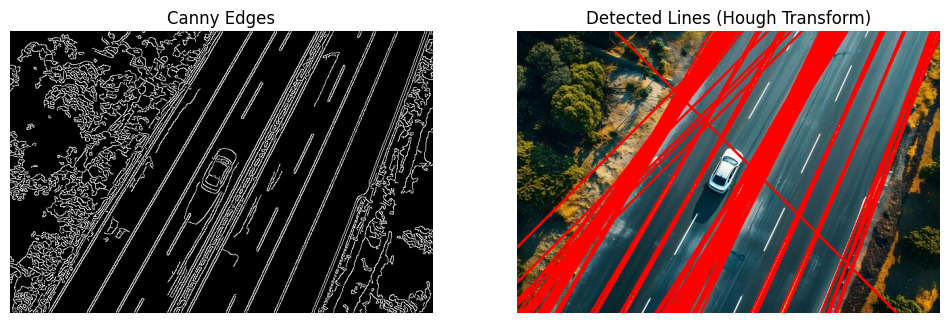

In [12]:

line_img_rgb = cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB)
edges_rgb = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Canny Edges")
plt.imshow(edges_rgb)
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Detected Lines (Hough Transform)")
plt.imshow(line_img_rgb)
plt.axis('off')
plt.show()


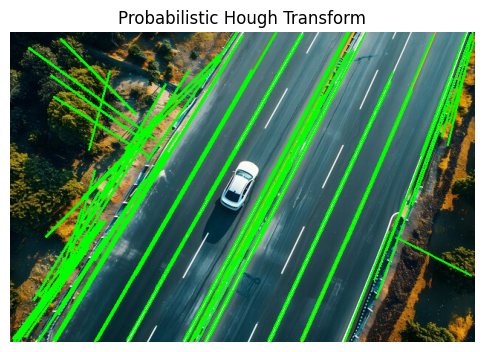

In [13]:
lines_p = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=100, maxLineGap=10)
line_img_p = img.copy()

if lines_p is not None:
    for line in lines_p:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img_p, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display Probabilistic Output
line_img_p_rgb = cv2.cvtColor(line_img_p, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.title("Probabilistic Hough Transform")
plt.imshow(line_img_p_rgb)
plt.axis('off')
plt.show()
